# Práctica 8. Máquinas de Vectores Soporte

### Grupo 41
Alumnos:
- Óscar Rico Rodríguez
- Jia Hao Yang

### Ejercicio 1: Máquina de vectores soporte lineal

Como se comentó en el apartado 8.1, la optimización de la ecuación 8.1.1 da lugar a una superficie de decisión lineal que maximiza la separación entre las muestras de las diferentes clases. En prácticas anteriores se han visto otros métodos que también obtienen este tipo de funciones de
decisión, por tanto es interesante ver cómo son de diferentes las mismas, según el método empleado para obtenerlas. Así en este primer ejercicio, se obtendrán las superficies de decisión obtenidas para el conjunto de datos sintéticos indicado en el apartado 8.2.1 con una máquina de vectores soporte lineal.

Al igual que en las prácticas anteriores, se hará uso de la de la librería sklearn que incluye una implementación de la SVM y que está definida en el módulo svm. En concreto este módulo implementa la clase SVC [15], que permite definir núcleo lineales y que será la que se va a utilizar
en esta práctica. Para obtener un SVM lineal con la clase SVC se debe asignar el valor ’linear’ al argumento kernel de la clase. Otro argumento de la clase es el término de regularización C que será un valor mayor que cero.

Esta clase comparte la API con otras de las vistas anteriormente e implementa los métodos fit y predict para entrenar el modelo y obtener la clasificación de muestras. Cuando el kernel es lineal como se ha indicado anteriormente, en los atributos de la clase intercept_ y coef_ se
encuentran los pesos correspondientes a cada función discriminante. También se puede acceder a los vectores soporte por medio del atributo support_vectors_.

Así en este ejercicio se deberá realizar lo siguiente:
- Obtener el conjunto de datos datos_svm.csv descrito en el apartado 8.2.1.
- Obtener un clasificador SVM lineal para cada uno de los siguientes valores de C, {0.01, 1, 10}, con todas las muestras del conjunto de datos.
- Para cada uno de los tres clasificadores anteriores de debe mostrar gráficamente (un gráfico por clasificador): las muestras utilizadas para entrenar, las superficies de decisión y los vectores soporte como cruces rojas.
- Analizar los resultados obtenidos dando una explicación de los mismos.


In [137]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#### Obtener el conjunto de datos datos_svm.csv descrito en el apartado 8.2.1.

In [138]:
df = pd.read_csv('./datos_svm.csv')
df.head()

,x1,x2,y
0,1.23,3.79,1
1,-1.25,-0.64,0
2,2.31,1.67,1
3,-0.14,-0.86,0
4,2.34,2.99,1


#### Obtener un clasificador SVM lineal para cada uno de los siguientes valores de C, {0.01, 1, 10}, con todas las muestras del conjunto de datos.

In [139]:
model_001 = SVC(kernel='linear', C=0.01)
model_1 = SVC(kernel='linear', C=1)
model_10 = SVC(kernel='linear', C=10)

#### Para cada uno de los tres clasificadores anteriores de debe mostrar gráficamente (un gráfico por clasificador): las muestras utilizadas para entrenar, las superficies de decisión y los vectores soporte como cruces rojas.

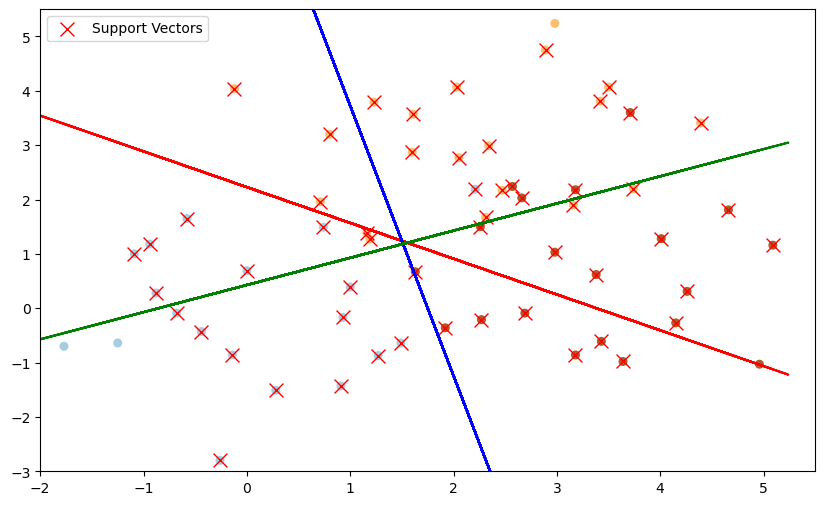

In [140]:
model_001.fit(df[['x1', 'x2']], df['y'])
coefs = model_001.coef_
intercept = model_001.intercept_
sv = model_001.support_vectors_

color = ['red', 'blue', 'green']

x = df

plt.figure(figsize=(10, 6))
plt.scatter(df['x1'], df['x2'], c=df['y'], s=30, cmap=plt.cm.Paired)
ax = plt.gca()
for i, coef in enumerate(coefs):
    plt.plot(x, (-(coef[0]/coef[1])*x) -(intercept[i]/coef[1]), color=color[i])

ax.scatter(sv[:, 0], sv[:, 1], s=100, 
           marker='x', c='red', linewidth=1, label='Support Vectors')

plt.legend(loc='upper left')
plt.ylim(-3, 5.5)
plt.xlim(-2, 5.5)
plt.show()

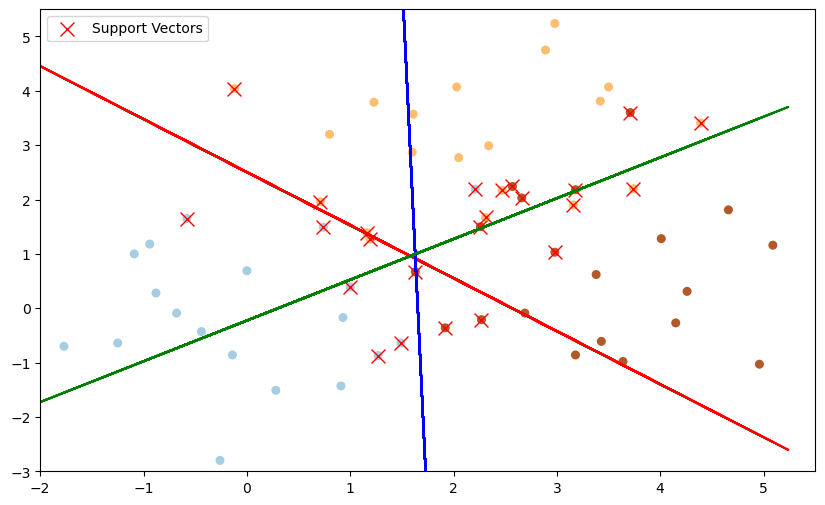

In [141]:
model_1.fit(df[['x1', 'x2']], df['y'])
coefs = model_1.coef_
intercept = model_1.intercept_
sv = model_1.support_vectors_

color = ['red', 'blue', 'green']

x = df

plt.figure(figsize=(10, 6))
plt.scatter(df['x1'], df['x2'], c=df['y'], s=30, cmap=plt.cm.Paired)
ax = plt.gca()
for i, coef in enumerate(coefs):
    plt.plot(x, (-(coef[0]/coef[1])*x) -(intercept[i]/coef[1]), color=color[i])

ax.scatter(sv[:, 0], sv[:, 1], s=100, 
           marker='x', c='red', linewidth=1, label='Support Vectors')

plt.legend(loc='upper left')
plt.ylim(-3, 5.5)
plt.xlim(-2, 5.5)
plt.show()


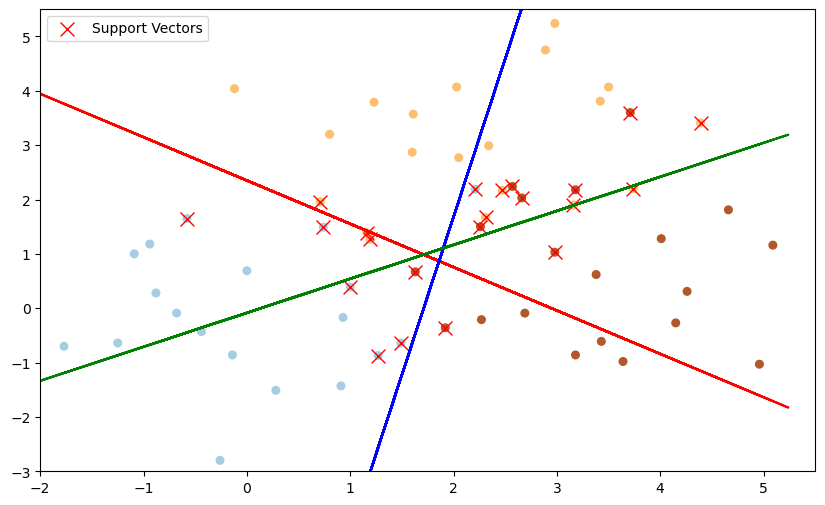

In [142]:
model_10.fit(df[['x1', 'x2']], df['y'])
coefs = model_10.coef_
intercept = model_10.intercept_
sv = model_10.support_vectors_

color = ['red', 'blue', 'green']

x = df

plt.figure(figsize=(10, 6))
plt.scatter(df['x1'], df['x2'], c=df['y'], s=30, cmap=plt.cm.Paired)
ax = plt.gca()
for i, coef in enumerate(coefs):
    plt.plot(x, (-(coef[0]/coef[1])*x) -(intercept[i]/coef[1]), color=color[i])

ax.scatter(sv[:, 0], sv[:, 1], s=100, 
           marker='x', c='red', linewidth=1, label='Support Vectors')

plt.legend(loc='upper left')
plt.ylim(-3, 5.5)
plt.xlim(-2, 5.5)
plt.show()

#### Analizar los resultados obtenidos dando una explicación de los mismos.

Para este ejercicio hemos entrenado 3 modelos de vectores soporte (SVC) usando la clase SVC de sklearn. Cada uno ha sido entrenado con un valor distinto para c {0.01,1,10}, el cual es el nivel de penalización (A menor c menos restrictivo será el modelo para escoger vectores soporte).

Primero debemos tener en cuenta que cada línea de color separa una clase de otra, la línea azul separa celestes y marrones, la línea roja separa celestes y naranjas, y la línea verde separa naranjas y marrones.

En el primer nivel `c: 0.01`, se puede observar que la cantidad de vectores soporte seleccionados es inmensa, pero, ¿cómo de bien están clasificadas las muestras?

Para el primer nivel la clasificación es buena en la mayoría de casos, exceptuando la frontera de decisión verde, en la cual hay un error de clasificación sobre 4 muestras marrones, aunque es algo comprensible ya que estás 4 muestras están bastante mezcladas con las muestras naranjas.

En el segundo nivel `c: 1`, se puede observar que la cantidad de vectores soporte seleccionados se ha reducido, pero, ¿cómo de bien están clasificadas las muestras?

Para el primer segundo la clasificación es buena en la mayoría de casos, exceptuando la frontera de decisión verde, la cual se podría ver como que empeora, ya que añade una muestra sin clasificar, aunque las fronteras de decisiones azules y rojas se ve que han sido más acertadas, pues los margenes son mayores.

En el tercer nivel `c: 10`, se puede observar que la cantidad de vectores soporte seleccionados se ha reducido drasticamente, pero, ¿cómo de bien están clasificadas las muestras?

Para el tercer nivel la clasificación es con diferencia la peor. El número de muestras mal clasificadas ha aumentado en todos los casos y no se ha obtenido ninguna mejora.

Bajo nuestro punto de vista la mejor opción podría ser el segundo nivel `c: 1`, ya que deja más margen en las fronteras de decisión al ser menos restrictiva y mejora en algunos casos sobre el primer nivel.



### Ejercicio 2: Implementar un clasificador de sexo basado en la imagen de la cara con SVM
El objetivo de esta tarea es comprobar si se pueden mejorar los resultados obtenidos con la regresión logística en el problema de clasificación de ejercicio 2 (apartado 6.4) de la Práctica 6. Para ello se hará uso de la clase SVC y debido a la complejidad del problema se planteará la utilización de otros núcleos aparte del lineal, es decir se utilizarán los núcleos polinomiales (kernel=’poly’) y funciones de base radial (kernel=’rbf’). Por tanto para encontrar la mejor combinación de núcleo y parámetro de regularización se debe dividir el conjunto de entrenamiento en entrenamiento y validación como se hizo en el apartado 7.3 de la Práctica 7.

Para completar este ejercicio se deberá realizar lo siguiente:
1. Leer el conjunto de entrenamiento y de test de los archivos CelebA-10K-train.csv y
CelebA-10K-test.csv respectivamente.
2. Dividir el conjunto de entrenamiento en entrenamiento (80%) y validación (20%).
3. Entrenar clasificadores basados en SVM utilizando los kernel lineal, polinomial y función de base radial con diferentes valores para el  coeficiente de regularización C.
4. Para la mejor combinación de núcleo y coeficiente de regularización, calcular la tasa de acierto en el conjunto de test.
5. (Opcional) Clasificar las imágenes con el clasificador con la mejor combinación de núcleo y coeficiente de regularización que están en el archivo comprimido ImagenesParaClasificar.zip que se encuentra en el github de las prácticas de la asignatura, y comparar los resultados con los obtenidos en la Práctica 6.

#### Leer el conjunto de entrenamiento y de test de los archivos CelebA-10K-train.csv y CelebA-10K-test.csv respectivamente.

In [143]:
train_df = pd.read_csv('./CelebA-10k-train.csv')
test_df = pd.read_csv('./CelebA-10k-test.csv')

In [144]:
train_df.head()

,Image_name,Gender,0,1,2,3,4,5,6,7,...,502,503,504,505,506,507,508,509,510,511
0,091932.jpg,female,-0.116635,-0.036023,0.119270,-0.118492,-0.011247,0.060698,0.060445,-0.135724,...,0.109374,-0.087184,-0.170514,-0.002174,0.251658,0.019284,0.073426,-0.181623,0.249872,-0.185412
1,107834.jpg,male,0.112001,0.106917,0.103252,0.226382,-0.223111,0.024005,0.061014,-0.057421,...,0.215107,-0.141468,-0.104929,0.106494,0.210237,0.078579,-0.125898,-0.041841,-0.260546,-0.260307
2,110166.jpg,female,-0.088096,-0.059410,0.295710,0.371716,0.257341,-0.023550,0.219391,-0.146221,...,-0.244827,-0.221200,-0.089513,0.087662,-0.097081,0.176293,-0.237461,0.418944,0.229182,-0.059442
3,133978.jpg,male,-0.105558,0.072108,0.112332,0.005667,0.085721,0.035998,0.084216,0.072809,...,-0.015807,0.172591,0.081388,-0.069114,0.034852,-0.098148,-0.020872,0.131987,-0.043374,-0.173870
4,106976.jpg,male,-0.090511,0.340148,0.312473,-0.453379,0.242707,0.068523,-0.004920,0.008697,...,-0.025792,-0.285553,-0.236192,-0.078685,-0.027608,-0.017950,0.004748,0.202833,0.097448,0.000682


In [145]:
test_df.head()

,Image_name,Gender,0,1,2,3,4,5,6,7,...,502,503,504,505,506,507,508,509,510,511
0,160799.jpg,male,-0.001214,0.050118,0.114304,-0.220199,0.125049,0.132411,0.187627,0.245111,...,0.128480,0.380787,-0.046444,0.076865,0.089790,-0.021989,0.226935,0.187877,0.158138,-0.012854
1,187197.jpg,female,0.039534,-0.071467,0.314972,0.306746,-0.101550,0.047111,-0.104315,0.245087,...,0.382490,0.176238,0.025530,-0.083777,0.168717,-0.056147,0.016460,0.331741,0.074749,0.220997
2,083076.jpg,male,-0.047089,0.333163,0.177810,0.474378,-0.044521,0.033442,0.073859,0.211728,...,0.053420,0.037373,-0.060997,-0.086737,-0.149124,-0.115099,-0.190493,-0.055844,-0.258208,0.033480
3,074509.jpg,female,-0.125720,-0.022470,-0.046570,-0.288704,0.019304,0.049715,0.106405,0.326570,...,0.414732,0.084099,0.145265,-0.133674,-0.067822,0.209204,0.214927,-0.004678,0.235657,-0.328508
4,144676.jpg,female,-0.113081,0.204668,0.352101,0.015899,0.057922,0.115096,-0.155819,0.231064,...,0.258996,-0.267745,-0.207185,-0.037760,-0.129075,-0.122945,0.193200,0.190426,-0.032470,-0.094818


#### Dividir el conjunto de entrenamiento en entrenamiento (80%) y validación (20%).

In [146]:
train, validation = train_test_split(train_df, test_size=0.2, random_state=42)

#### Entrenar clasificadores basados en SVM utilizando los kernel lineal, polinomial y función de base radial con diferentes valores para el coeficiente de regularización C.

##### kernel = lineal

In [147]:
svc_lineal_001 = SVC(kernel='linear', C=0.01)
svc_lineal_1 = SVC(kernel='linear', C=1)
svc_lineal_10 = SVC(kernel='linear', C=10)
svc_lineal_20 = SVC(kernel='linear', C=20)
svc_lineal_50 = SVC(kernel='linear', C=50)
svc_lineal_100 = SVC(kernel='linear', C=100)

##### kernel = poly

In [148]:
svc_polinomial_001 = SVC(kernel='poly', C=0.01, degree=2)
svc_polinomial_1 = SVC(kernel='poly', C=1, degree=2)
svc_polinomial_10 = SVC(kernel='poly', C=10, degree=2)
svc_polinomial_20 = SVC(kernel='poly', C=20, degree=2)
svc_polinomial_50 = SVC(kernel='poly', C=50, degree=2)
svc_polinomial_100 = SVC(kernel='poly', C=100, degree=2)

##### kernel = rbf (radial base function)

In [149]:
svc_rbf_001 = SVC(kernel='rbf', C=0.01, gamma=0.1)
svc_rbf_1 = SVC(kernel='rbf', C=1, gamma=0.1)
svc_rbf_10 = SVC(kernel='rbf', C=10, gamma=0.1)
svc_rbf_20 = SVC(kernel='rbf', C=20, gamma=0.1)
svc_rbf_50 = SVC(kernel='rbf', C=50, gamma=0.1)
svc_rbf_100 = SVC(kernel='rbf', C=100, gamma=0.1)

#### Para la mejor combinación de núcleo y coeficiente de regularización, calcular la tasa de acierto en el conjunto de test.

In [150]:
lineal_001 = svc_lineal_001.fit(train.iloc[:, 2:], train['Gender'])
lineal_1 = svc_lineal_1.fit(train.iloc[:, 2:], train['Gender'])
lineal_10 = svc_lineal_10.fit(train.iloc[:, 2:], train['Gender'])
lineal_20 = svc_lineal_20.fit(train.iloc[:, 2:], train['Gender'])
lineal_50 = svc_lineal_50.fit(train.iloc[:, 2:], train['Gender'])
lineal_100 = svc_lineal_100.fit(train.iloc[:,2:], train['Gender'])

lineal_predict_001 = lineal_001.predict(validation.iloc[:, 2:])
lineal_predict_1 = lineal_1.predict(validation.iloc[:, 2:])
lineal_predict_10 = lineal_10.predict(validation.iloc[:, 2:])
lineal_predict_20 = lineal_20.predict(validation.iloc[:, 2:])
lineal_predict_50 = lineal_50.predict(validation.iloc[:, 2:])
lineal_predict_100 = lineal_100.predict(validation.iloc[:, 2:])

lineal_acc_score_001 = accuracy_score(validation.iloc[:, 1], lineal_predict_001)
lineal_acc_score_1 = accuracy_score(validation.iloc[:, 1], lineal_predict_1)
lineal_acc_score_10 = accuracy_score(validation.iloc[:, 1], lineal_predict_10)
lineal_acc_score_20 = accuracy_score(validation.iloc[:, 1], lineal_predict_20)
lineal_acc_score_50 = accuracy_score(validation.iloc[:, 1], lineal_predict_50)
lineal_acc_score_100 = accuracy_score(validation.iloc[:, 1], lineal_predict_100)

print(f'Accuracy score para C=0.01: {lineal_acc_score_001}')
print(f'Accuracy score para C=1: {lineal_acc_score_1}')
print(f'Accuracy score para C=10: {lineal_acc_score_10}')
print(f'Accuracy score para C=20: {lineal_acc_score_20}')
print(f'Accuracy score para C=50: {lineal_acc_score_50}')
print(f'Accuracy score para C=100: {lineal_acc_score_100}')

Accuracy score para C=0.01: 0.89
Accuracy score para C=1: 0.908
Accuracy score para C=10: 0.93
Accuracy score para C=20: 0.939
Accuracy score para C=50: 0.948
Accuracy score para C=100: 0.948


In [151]:
poly_001 = svc_polinomial_001.fit(train.iloc[:, 2:], train['Gender'])
poly_1 = svc_polinomial_1.fit(train.iloc[:, 2:], train['Gender'])
poly_10 = svc_polinomial_10.fit(train.iloc[:, 2:], train['Gender'])
poly_20 = svc_polinomial_20.fit(train.iloc[:, 2:], train['Gender'])
poly_50 = svc_polinomial_50.fit(train.iloc[:, 2:], train['Gender'])
poly_100 = svc_polinomial_100.fit(train.iloc[:, 2:], train['Gender'])

poly_predict_001 = poly_001.predict(validation.iloc[:, 2:])
poly_predict_1 = poly_1.predict(validation.iloc[:, 2:])
poly_predict_10 = poly_10.predict(validation.iloc[:, 2:])
poly_predict_20 = poly_20.predict(validation.iloc[:, 2:])
poly_predict_50 = poly_50.predict(validation.iloc[:, 2:])
poly_predict_100 = poly_100.predict(validation.iloc[:, 2:])

poly_acc_score_001 = accuracy_score(validation.iloc[:, 1], poly_predict_001)
poly_acc_score_1 = accuracy_score(validation.iloc[:, 1], poly_predict_1)
poly_acc_score_10 = accuracy_score(validation.iloc[:, 1], poly_predict_10)
poly_acc_score_20 = accuracy_score(validation.iloc[:, 1], poly_predict_20)
poly_acc_score_50 = accuracy_score(validation.iloc[:, 1], poly_predict_50)
poly_acc_score_100 = accuracy_score(validation.iloc[:, 1], poly_predict_100)

print(f'Accuracy score para C=0.01: {poly_acc_score_001}')
print(f'Accuracy score para C=1: {poly_acc_score_1}')
print(f'Accuracy score para C=10: {poly_acc_score_10}')
print(f'Accuracy score para C=20: {poly_acc_score_20}')
print(f'Accuracy score para C=50: {poly_acc_score_50}')
print(f'Accuracy score para C=100: {poly_acc_score_100}')

Accuracy score para C=0.01: 0.59
Accuracy score para C=1: 0.96
Accuracy score para C=10: 0.956
Accuracy score para C=20: 0.956
Accuracy score para C=50: 0.957
Accuracy score para C=100: 0.957


In [152]:
rbf_001 = svc_rbf_001.fit(train.iloc[:, 2:], train['Gender'])
rbf_1 = svc_rbf_1.fit(train.iloc[:, 2:], train['Gender'])
rbf_10 = svc_rbf_10.fit(train.iloc[:, 2:], train['Gender'])
rbf_20 = svc_rbf_20.fit(train.iloc[:, 2:], train['Gender'])
rbf_50 = svc_rbf_50.fit(train.iloc[:, 2:], train['Gender'])
rbf_100 = svc_rbf_100.fit(train.iloc[:, 2:], train['Gender'])

rbf_predict_001 = rbf_001.predict(validation.iloc[:, 2:])
rbf_predict_1 = rbf_1.predict(validation.iloc[:, 2:])
rbf_predict_10 = rbf_10.predict(validation.iloc[:, 2:])
rbf_predict_20 = rbf_20.predict(validation.iloc[:, 2:])
rbf_predict_50 = rbf_50.predict(validation.iloc[:, 2:])
rbf_predict_100 = rbf_100.predict(validation.iloc[:, 2:])

rbf_acc_score_001 = accuracy_score(validation.iloc[:, 1], rbf_predict_001)
rbf_acc_score_1 = accuracy_score(validation.iloc[:, 1], rbf_predict_1)
rbf_acc_score_10 = accuracy_score(validation.iloc[:, 1], rbf_predict_10)
rbf_acc_score_20 = accuracy_score(validation.iloc[:, 1], rbf_predict_20)
rbf_acc_score_50 = accuracy_score(validation.iloc[:, 1], rbf_predict_50)
rbf_acc_score_100 = accuracy_score(validation.iloc[:, 1], rbf_predict_100)

print(f'Accuracy score para C=0.01: {rbf_acc_score_001}')
print(f'Accuracy score para C=1: {rbf_acc_score_1}')
print(f'Accuracy score para C=10: {rbf_acc_score_10}')
print(f'Accuracy score para C=20: {rbf_acc_score_20}')
print(f'Accuracy score para C=50: {rbf_acc_score_50}')
print(f'Accuracy score para C=100: {rbf_acc_score_100}')

Accuracy score para C=0.01: 0.589
Accuracy score para C=1: 0.945
Accuracy score para C=10: 0.952
Accuracy score para C=20: 0.95
Accuracy score para C=50: 0.95
Accuracy score para C=100: 0.95


In [153]:
final_scores = {
    'lineal_001': lineal_acc_score_001,
    'lineal_1': lineal_acc_score_1,
    'lineal_10': lineal_acc_score_10,
    'lineal_20': lineal_acc_score_20,
    'lineal_50': lineal_acc_score_50,
    'lineal_100': lineal_acc_score_100,
    'poly_001': poly_acc_score_001,
    'poly_1': poly_acc_score_1,
    'poly_10': poly_acc_score_10,
    'poly_20': poly_acc_score_20,
    'poly_50': poly_acc_score_50,
    'poly_100': poly_acc_score_100,
    'rbf_001': rbf_acc_score_001,
    'rbf_1': rbf_acc_score_1,
    'rbf_10': rbf_acc_score_10,
    'rbf_20': rbf_acc_score_20,
    'rbf_50': rbf_acc_score_50,
    'rbf_100': rbf_acc_score_100
}
final_scores

{'lineal_001': 0.89,
 'lineal_1': 0.908,
 'lineal_10': 0.93,
 'lineal_20': 0.939,
 'lineal_50': 0.948,
 'lineal_100': 0.948,
 'poly_001': 0.59,
 'poly_1': 0.96,
 'poly_10': 0.956,
 'poly_20': 0.956,
 'poly_50': 0.957,
 'poly_100': 0.957,
 'rbf_001': 0.589,
 'rbf_1': 0.945,
 'rbf_10': 0.952,
 'rbf_20': 0.95,
 'rbf_50': 0.95,
 'rbf_100': 0.95}

In [154]:
val, max = 0, ''
for i, j in final_scores.items():
    if val < j:
        val = j
        max = i
print(f'El mejor modelo es {max} con un accuracy de {val}.')

El mejor modelo es poly_1 con un accuracy de 0.96.


In [155]:
best_combination = SVC(kernel='poly', C=1, degree=2)
best = svc_polinomial_1.fit(train_df.iloc[:, 2:], train_df['Gender'])
best_predict = best.predict(test_df.iloc[:, 2:])
best_acc_score = accuracy_score(test_df.iloc[:, 1], best_predict)
print(f'Accuracy score para el mejor modelo: {best_acc_score}')

Accuracy score para el mejor modelo: 0.9642


#### Clasificar las imágenes con el clasificador con la mejor combinación de núcleo y coeficiente de regularización que están en el archivo comprimido ImagenesParaClasificar.zip que se encuentra en el github de las prácticas de la asignatura, y comparar los resultados con los obtenidos en la Práctica 6.

In [156]:
path = './ImagenesParaClasificar'
files = os.listdir(path)

In [157]:
images = pd.DataFrame()
images = test_df[test_df['Image_name'].isin(files)]

In [158]:
results = best.predict(images.iloc[:,2:])
for i, image in enumerate(files):
    print(f'La imagen {image} es {results[i]}')

La imagen 000038.jpg es female
La imagen 000047.jpg es female
La imagen 000082.jpg es male
La imagen 000220.jpg es female
La imagen 000595.jpg es female
La imagen 000767.jpg es male
La imagen 001182.jpg es male
La imagen 002185.jpg es female


In [159]:
accuracy_img = accuracy_score(images.iloc[:,1:2], results)
print(f'La tasa de acierto es de {accuracy_img*100:.2f}%')

La tasa de acierto es de 75.00%
